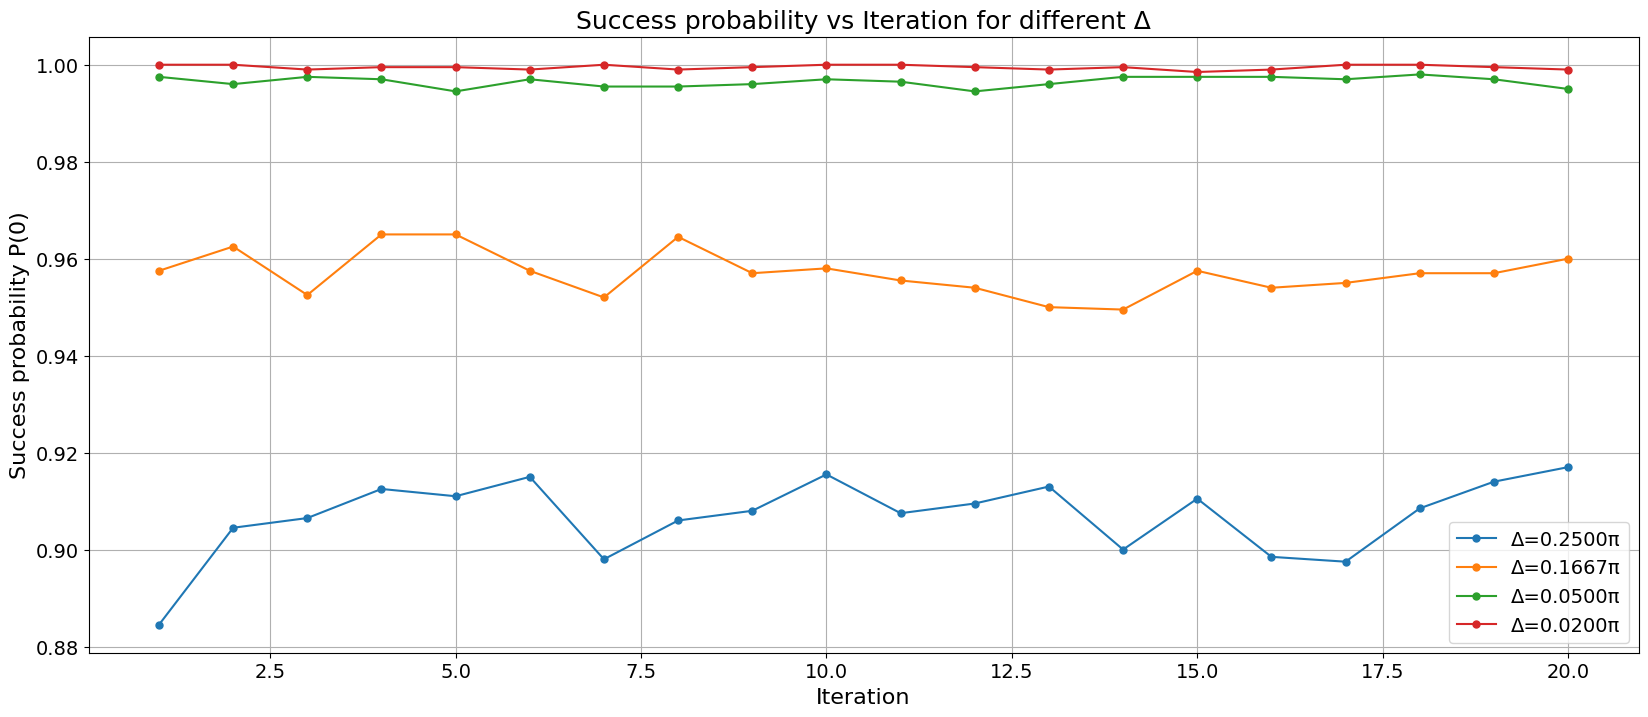

In [5]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit.result import marginal_counts
import numpy as np
import matplotlib.pyplot as plt

# ---------------- Parameters ----------------
psi = [1, 2, 3, 4, 5, 6, 7, 8]
phi = [1, 2, 3, 4, 5, 6, 7, 8]
n = 3          # number of qubits per register
m = 20         # number of iterations
number_of_layers = 2
shots = 2000

# Pick 4 fixed δ values (as multiples of π)
delta_fractions = [1/4, 1/6, 1/20, 1/50]   # π/4, π/6, π/20, π/50
deltas = [f * np.pi for f in delta_fractions]

# Build MPS initializers
psi_state = QuantumState.from_dense_data(data=psi, normalize=True)
phi_state = QuantumState.from_dense_data(data=phi, normalize=True)
U_psi = psi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)
U_phi = phi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)
U_phi_dagger = U_phi.inverse()

sim = AerSimulator()
success_probs_dict = {}

# ---------------- Function to run one experiment ----------------
def run_experiment(delta):
    psi_reg = QuantumRegister(n, name="ψ")
    phi_reg = QuantumRegister(n, name="φ")
    cregs = [ClassicalRegister(n, name=f"c{k}") for k in range(m)]
    qc = QuantumCircuit(psi_reg, phi_reg, *cregs)

    # Initialize ψ and φ
    qc.append(U_psi, psi_reg)
    qc.append(U_phi, phi_reg)

    for k in range(m):
        # bit matching
        for i in range(n):
            qc.cx(phi_reg[n-1-i], psi_reg[n-1-i], ctrl_state=0)

        # controlled phase
        qc.mcp(delta, psi_reg[0:-1], psi_reg[-1])

        # undo matching
        for i in range(n):
            qc.cx(phi_reg[i], psi_reg[i], ctrl_state=0)

        # measure φ
        qc.append(U_phi_dagger, phi_reg)
        qc.measure(phi_reg, cregs[k])
        qc.reset(phi_reg)

        if k < m-1:
            qc.append(U_phi, phi_reg)

    qc.save_statevector()
    qc_t = transpile(qc.decompose(reps=10), sim, optimization_level=0)
    result = sim.run(qc_t, shots=shots).result()

    # Collect per-iteration success probabilities
    success_probs = []
    for k in range(m):
        indices = list(range(k*n, (k+1)*n))  # clbits for c[k]
        counts_k = marginal_counts(result.get_counts(qc_t), indices)
        zero_state = "0"*n
        success_probs.append(counts_k.get(zero_state, 0) / shots)
    return success_probs

# ---------------- Run experiments for each δ ----------------
for delta in deltas:
    success_probs_dict[delta] = run_experiment(delta)

# ---------------- Plotting ----------------
plt.figure(figsize=(20, 8))
for delta in deltas:
    sim_probs = success_probs_dict[delta]
    plt.plot(range(1, m+1), sim_probs, marker='o', linestyle='-', markersize=5,
             label=f"Δ={delta/np.pi:.4f}π")

plt.xlabel("Iteration", fontsize=16)
plt.ylabel("Success probability P(0)", fontsize=16)
plt.title("Success probability vs Iteration for different Δ", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.show()


Running δ = 0.03927 ...
{'000': 2000}
{'111': 1, '000': 1998, '001': 1}
{'000': 1999, '111': 1}
{'000': 2000}
{'000': 2000}
{'111': 1, '000': 1999}
{'000': 2000}
{'000': 2000}
{'000': 2000}
{'000': 2000}
{'000': 1999, '111': 1}
{'000': 2000}
{'110': 1, '000': 1999}
{'000': 2000}
{'000': 1999, '111': 1}
{'000': 2000}
{'000': 1999, '110': 1}
{'011': 1, '000': 1999}
{'000': 2000}
{'000': 1999, '001': 1}
{'000': 1999, '110': 1}
{'000': 2000}
{'000': 2000}
{'100': 1, '000': 1999}
{'000': 2000}
{'000': 2000}
{'000': 1999, '001': 1}
{'000': 1999, '001': 1}
{'000': 2000}
{'000': 1999, '001': 1}
{'000': 2000}
{'111': 1, '000': 1999}
{'000': 2000}
{'000': 2000}
{'000': 2000}
{'000': 2000}
{'000': 1997, '110': 1, '111': 2}
{'000': 2000}
{'000': 2000}
{'000': 2000}
{'000': 1999, '110': 1}
{'000': 1999, '111': 1}
{'000': 2000}
{'000': 2000}
{'111': 1, '000': 1999}
{'000': 2000}
{'000': 2000}
{'000': 1999, '111': 1}
{'000': 1997, '111': 2, '110': 1}
{'000': 2000}
{'000': 1999, '100': 1}
{'100': 1, '

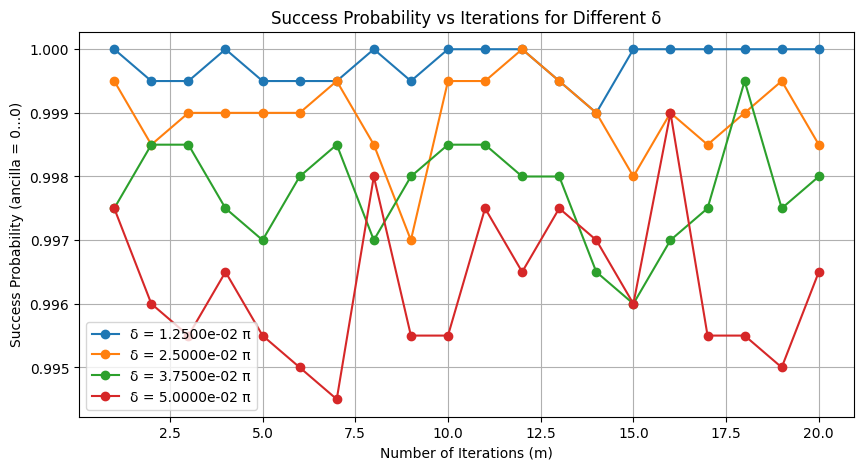

In [5]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_mps_initializer.datatypes import QuantumState
from qiskit.result import marginal_counts
import numpy as np
import matplotlib.pyplot as plt

#  Parameters
psi = [1, 2, 3, 4, 5, 6, 7, 8]
phi = [1, 2, 3, 4, 5, 6, 7, 8]
n = 3           # number of qubits for ψ and φ
number_of_layers = 2
shots = 2000


delta_values = [np.pi/80, np.pi/40, 3*np.pi/80, np.pi/20]


m_values = list(range(1, 21))   

#Build MPS initializers
psi_state = QuantumState.from_dense_data(data=psi, normalize=True)
phi_state = QuantumState.from_dense_data(data=phi, normalize=True)
U_psi = psi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)
U_phi = phi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)
U_phi_dagger = U_phi.inverse()

#Function to run one experiment
def run_experiment(delta, m, shots=2000):
    psi_reg = QuantumRegister(n, "ψ")
    phi_reg = QuantumRegister(n, "φ")
    cregs = [ClassicalRegister(n, name=f"c{k}") for k in range(m)]
    qc = QuantumCircuit(psi_reg, phi_reg, *cregs)

    qc.append(U_psi, psi_reg)
    qc.append(U_phi, phi_reg)

    for k in range(m):
        # matching
        for i in range(n):
            qc.cx(phi_reg[n-1-i], psi_reg[n-1-i], ctrl_state=0)
        # controlled phase
        qc.mcp(delta, psi_reg[0:-1], psi_reg[-1])
        # unmatch
        for i in range(n):
            qc.cx(phi_reg[i], psi_reg[i], ctrl_state=0)

        qc.append(U_phi_dagger, phi_reg)
        qc.measure(phi_reg, cregs[k])
        qc.reset(phi_reg)
        if k < m - 1:
            qc.append(U_phi, phi_reg)

    sim = AerSimulator()
    qc_t = transpile(qc.decompose(reps=10), sim, optimization_level=0)
    result = sim.run(qc_t, shots=shots).result()

    # Compute success probability (ancilla = all zeros)
    success_probs = []
    for k in range(m):
        indices = list(range(k*n, (k+1)*n))
        counts_k = marginal_counts(result.get_counts(qc_t), indices)
        zero_state = "0"*n
        success_probs.append(counts_k.get(zero_state, 0) / shots)
        print(counts_k)
    return success_probs

# Run experiments for all δ values
all_results = {}
for delta in delta_values:
    print(f"Running δ = {delta:.5f} ...")
    probs_for_m = []
    for m in m_values:
        success_list = run_experiment(delta, m)
        # take last iteration's success probability (i.e. after m-th step)
        probs_for_m.append(success_list[-1])
    all_results[delta] = probs_for_m

# Plotting
plt.figure(figsize=(10,5))
for delta in delta_values:
    plt.plot(m_values, all_results[delta], 'o-', label=f"δ = {delta/np.pi:.4e} π")

plt.xlabel("Number of Iterations (m)")
plt.ylabel("Success Probability (ancilla = 0...0)")
plt.title("Success Probability vs Iterations for Different δ")
plt.grid(True)
plt.legend()
plt.show()



Running δ = 0.03927 ...

Running δ = 0.07854 ...

Running δ = 0.11781 ...

Running δ = 0.15708 ...


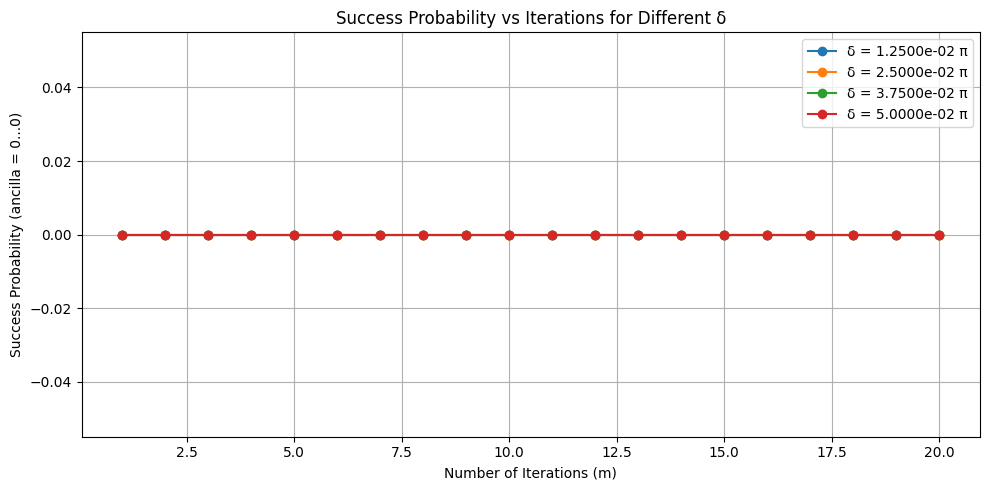

In [7]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_mps_initializer.datatypes import QuantumState
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------
# Parameters
# ---------------------------------------------------
psi = [1, 2, 3, 4, 5, 6, 7, 8]
phi = [1, 2, 3, 4, 5, 6, 7, 8]
n = 3                    # number of qubits for ψ and φ
number_of_layers = 2
shots = 2000

delta_values = [np.pi/80, np.pi/40, 3*np.pi/80, np.pi/20]
m_values = list(range(1, 21))

# ---------------------------------------------------
# Build MPS initializers
# ---------------------------------------------------
psi_state = QuantumState.from_dense_data(data=psi, normalize=True)
phi_state = QuantumState.from_dense_data(data=phi, normalize=True)
U_psi = psi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)
U_phi = phi_state.generate_mps_initializer_circuit(number_of_layers=number_of_layers)
# U_phi_dagger = U_phi.inverse()   # no longer needed

# ---------------------------------------------------
# Experiment runner
# ---------------------------------------------------
def run_experiment(delta, m, shots=2000):
    psi_reg = QuantumRegister(n, "ψ")
    phi_reg = QuantumRegister(n, "φ")
    cregs = [ClassicalRegister(n, name=f"c{k}") for k in range(m)]
    qc = QuantumCircuit(psi_reg, phi_reg, *cregs)

    # --- Initialize ---
    qc.append(U_psi, psi_reg)
    qc.append(U_phi, phi_reg)

    # --- Main protocol rounds ---
    for k in range(m):
        # matching
        for i in range(n):
            qc.cx(phi_reg[n-1-i], psi_reg[n-1-i], ctrl_state=0)
        # controlled phase
        qc.mcp(delta, psi_reg[0:-1], psi_reg[-1])
        # unmatch
        for i in range(n):
            qc.cx(phi_reg[i], psi_reg[i], ctrl_state=0)

        # ❌ no inverse anymore — directly measure ancilla
        qc.measure(phi_reg, cregs[k])
        qc.reset(phi_reg)
        if k < m - 1:
            qc.append(U_phi, phi_reg)

    # --- Simulation ---
    sim = AerSimulator()
    qc_t = transpile(qc.decompose(reps=10), sim, optimization_level=0)
    result = sim.run(qc_t, shots=shots, memory=True).result()
    memories = result.get_memory(qc_t)  # list of tuples (one per shot)

    # --- Compute success probabilities per round ---
    zero_state = "0" * n
    success_probs = []

    # Each memory entry looks like a tuple ('000', '010', '111', ...)
    for k in range(m):
        successes = sum(mem[k] == zero_state for mem in memories)
        success_probs.append(successes / shots)

    return success_probs

# ---------------------------------------------------
# Run all experiments and collect results
# ---------------------------------------------------
all_results = {}
for delta in delta_values:
    print(f"\nRunning δ = {delta:.5f} ...")
    probs_for_m = []
    for m in m_values:
        success_list = run_experiment(delta, m)
        probs_for_m.append(success_list[-1])  # last iteration success prob
    all_results[delta] = probs_for_m

# ---------------------------------------------------
# Plotting
# ---------------------------------------------------
plt.figure(figsize=(10,5))
for delta in delta_values:
    plt.plot(m_values, all_results[delta], 'o-', label=f"δ = {delta/np.pi:.4e} π")

plt.xlabel("Number of Iterations (m)")
plt.ylabel("Success Probability (ancilla = 0...0)")
plt.title("Success Probability vs Iterations for Different δ")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
